<h1> <center>Analysis on Bike Sharing Demand </h1>

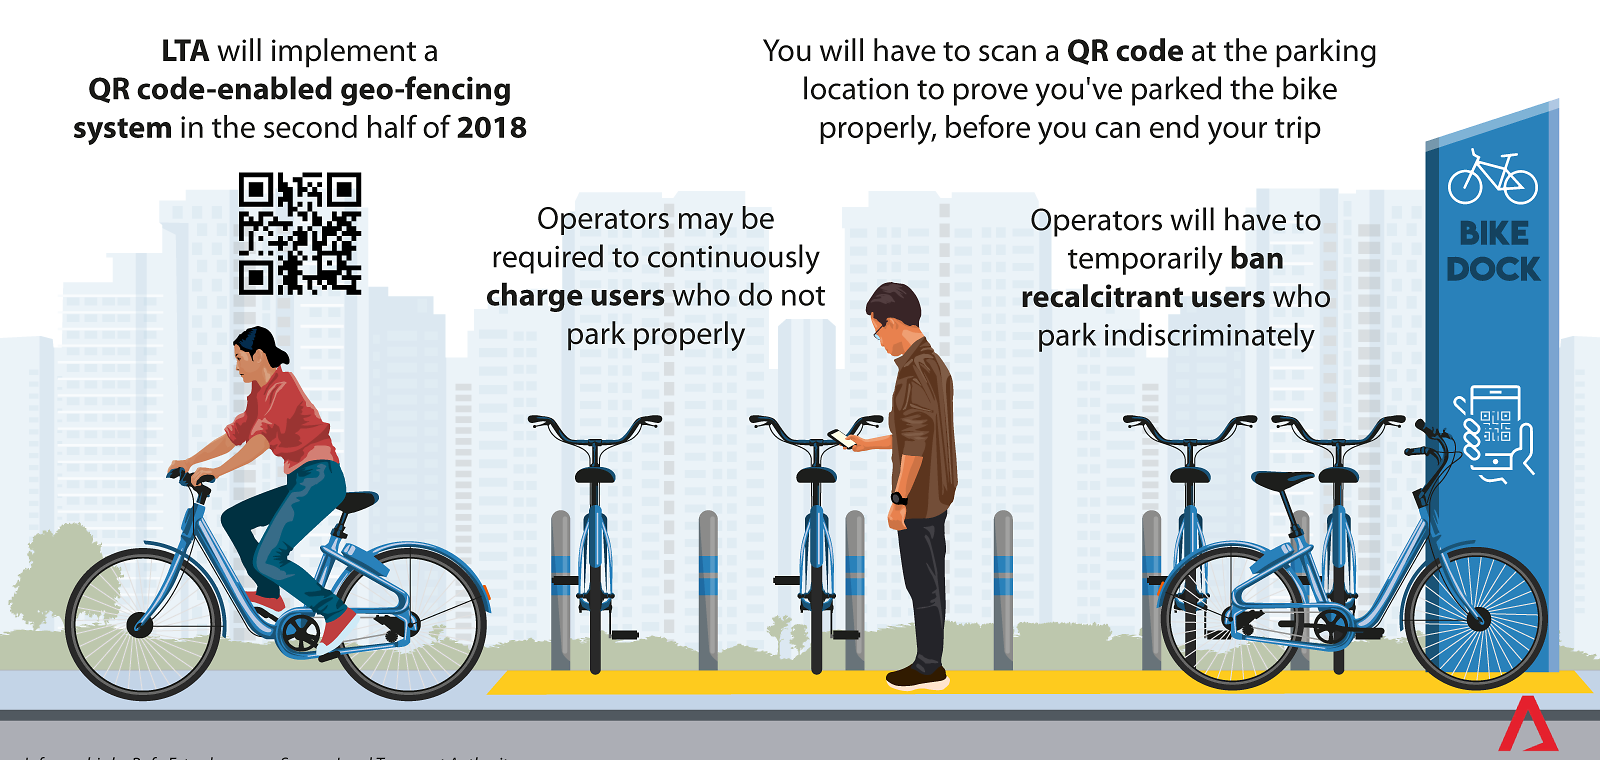

## About the Bike Sharing Dataset

### Overview

Bike sharing is a service in which bicycles are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" and return it at another dock belonging to the same system. Docks are special bike racks that lock the bike, and only release it by application or computer control. The user enters payment information, and the computer unlocks a bike. The user returns the bike by placing it in the dock, which locks it in place. Other systems are dockless. For many systems, smartphone mapping apps show nearby available bikes and open docks.

Currently, there are about over 1571 bike-sharing programs around the world which are composed of over 16–18 million bicycles. According to media reports in India, the bicycle market in India is worth USD 1.2 billion, and production currently stands at 15 million units and India is next big market for Bike sharing.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.


***
***


# Table of Contents

* Attribute Information


* Hypothesis


* Importing the libraries and dataset
    
    - Checking structure of data
    
    - Checking Data Types
    
    - Changing Data Types
    
    - Checking Summary of the Data


* Data Cleaning

    - Checking for Null values
    
    - Checking for Duplicates


* Exploratory Data Analysis


* Model Building

    - Linear Regression
    - SGD REgression to build linear model
    - Decision Tree Regression
    - Random Forest Regression


* Conclusion

***
***


# Attribute Information

There are two files in the UCI repository hour.csv and day.csv have the following fields :

 * __instant__: record index
 
 * __dteday__ : date
 
 * __season__ : season (1:springer, 2:summer, 3:fall, 4:winter)
 
 * __yr__ : year (0: 2011, 1:2012)
 
 * __mnth__ : month ( 1 to 12)
 
 * __hr__ : hour (0 to 23)
 
 * __holiday__ : weather day is holiday or not
 
 * __weekday__ : day of the week
 
 * __workingday__ : if day is neither weekend nor holiday is 1, otherwise is 0.
 
 * __weathersit__ :
 
     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
     - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

 * __temp__: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in
   hourly scale)
 
 * __atemp__: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16,
   t_max=+50 (only in hourly scale)
 
 * __hum__: Normalized humidity. The values are divided to 100 (max)
 
 * __windspeed__: Normalized wind speed. The values are divided to 67 (max)
 
 * __casual__: count of casual users
 
 * __registered__: count of registered users
 
 * __cnt__: count of total rental bikes including both casual and registered

__NOTE: 'hr'__ is variable missing in the __days.csv file__ as it contain the data daywise.  


***
***

### Hypothysis : 
  * Null: The bike sharing counts have no effect by these parameters
  * Alternative: The bike sharing counts effected by these parameters

***
***

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Loading the data into Jupyter notebook

In [245]:
df1= pd.read_csv("F:\Python\Bike Sharing\Bike-Sharing-Dataset\hour.csv")
df2= pd.read_csv("F:\Python\Bike Sharing\Bike-Sharing-Dataset\day.csv")

In [246]:
df1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [4]:
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Checking the structure of the dataset

In [5]:
print("d1 shape", df1.shape)
print("d2 shape", df2.shape)

d1 shape (17379, 17)
d2 shape (731, 16)


### We will do analysis on df1 dataset as it will hourly basis analysis

#### Creating a copy of the dataset so that orginal data will not be alter

In [463]:
import copy
df= copy.deepcopy(df1)

### Checking the data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### _We have droped the instant variable as it is a unique key and it will not make any effect on analysis_

In [321]:
df= df.drop(['instant'], axis=1)

#### _Changng the variables into categorical which are in numerical form_

In [309]:
df['season'] = df.season.astype(object)
df['mnth'] = df.mnth.astype(object)
df['yr'] = df.mnth.astype(object)
df['weekday'] = df.weekday.astype(object)
df['hr'] = df.hr.astype(object)
df['holiday'] = df.holiday.astype(object)
df['workingday'] = df.workingday.astype(object)
df['weathersit'] = df.weathersit.astype(object)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null object
yr            17379 non-null object
mnth          17379 non-null object
hr            17379 non-null object
holiday       17379 non-null object
weekday       17379 non-null object
workingday    17379 non-null object
weathersit    17379 non-null object
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 2.1+ MB


#### _Checking the summary of the data_

In [9]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### _Checking names of all the columns_

In [251]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

***
***

## Data Cleaning

#### * _Checking for null values_ 

In [11]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### * _Checking for the duplicates_

In [12]:
df.duplicated().sum()

0

***
***

## Exploratory data analysis

***

Text(0.5, 1.0, 'Count Vs Working day')

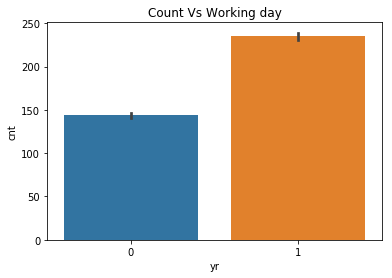

In [83]:
sns.barplot(data=df,x="yr",y="cnt").set_title("Count Vs Working day")

Text(0.5, 1.0, 'Count Vs Working day')

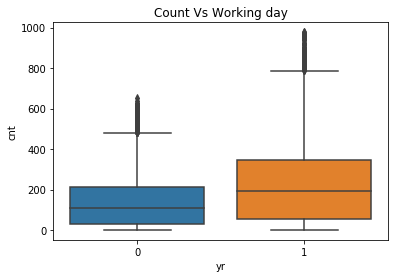

In [164]:
sns.boxplot(data=df,x="yr",y="cnt").set_title("Count Vs Working day")

#### * _We clearly see there is increase in demand of the Bike sharing in 2012 as compare to 2011._

Text(0.5, 1.0, 'Season vs Count')

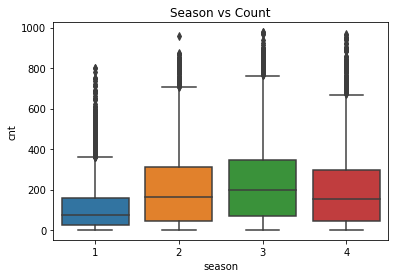

In [84]:
sns.boxplot(data=df,x="season",y="cnt").set_title("Season vs Count")

#### _Maximum renting is in fall season and minimun is in spring season. There is almost equal renting of the bikes in summer and winter._

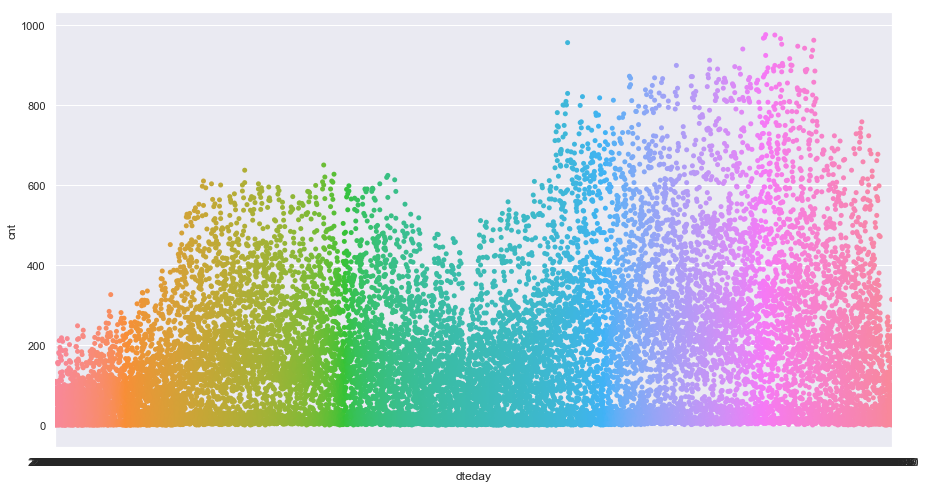

In [479]:
plt.figure(figsize=(15,8))
sns.swarmplot(data=df,x="dteday",y="cnt")

Text(0.5, 1.0, 'Bike rented on working days')

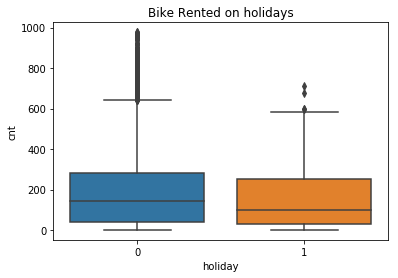

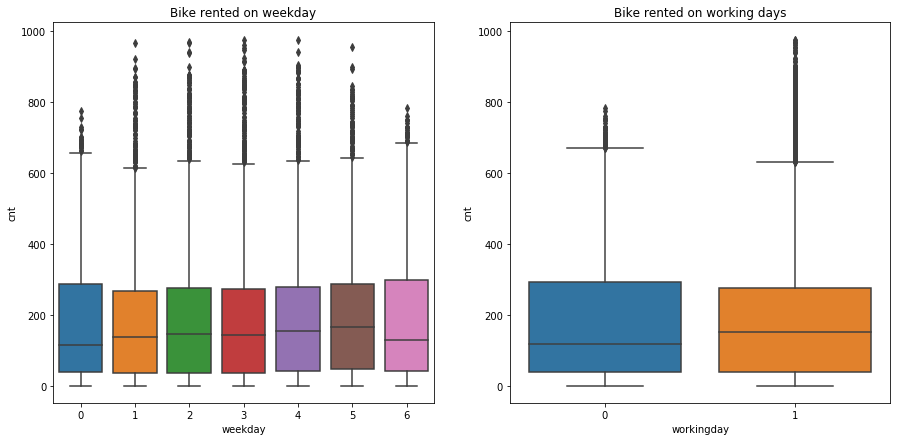

In [134]:
fig,ax1 = plt.subplots()
sns.boxplot(data=df, y='cnt',x='holiday', ax=ax1).set_title("Bike Rented on holidays")
fig,(ax2,ax3) = plt.subplots(ncols=2, figsize=(15,7))
sns.boxplot(data=df, y='cnt',x='weekday', ax=ax2).set_title("Bike rented on weekday")
sns.boxplot(data=df, y='cnt',x='workingday',ax=ax3).set_title("Bike rented on working days")


#### _We can observe that bike rented on all the weekdays and working days are same_

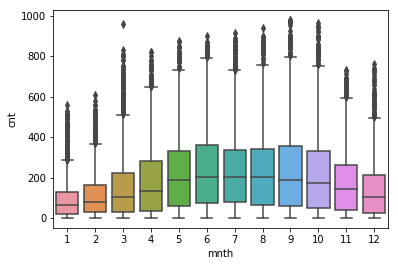

In [18]:
sns.boxplot(data=df,x="mnth",y="cnt")

___We can see there is relation between month and bike demand  :___
 * _Higher: 5-9 month_
 * _Average: 3-4 & 10-11 month_
 * _Low: 1 & 12 month_

Text(0.5, 1.0, 'Count Vs Weather situation')

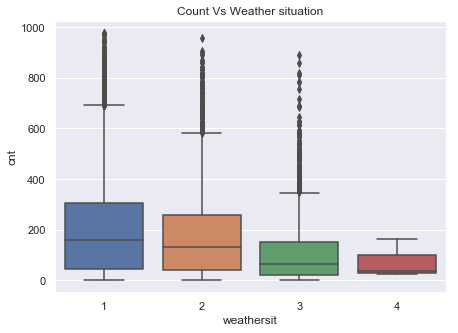

In [476]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,y="cnt",x="weathersit").set_title("Count Vs Weather situation")

___The bike demand is depend on the weather codition as :___
   * _High : Clear, Few clouds, Partly cloudy, Partly cloudy_
   * _High : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist_
   * _Average: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds_
   * _Low  : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog_


Text(0.5, 1.0, 'Count Vs Working day')

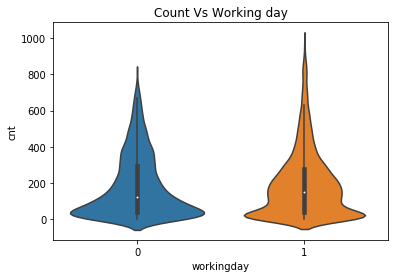

In [151]:
sns.violinplot(data=df,y="cnt",x="workingday").set_title("Count Vs Working day")

#### _By this chart we can see the number of bike sharing is greater on working days but lets see is this a case or it is effected by outliers._

Text(0.5, 1.0, 'Count Vs Working day')

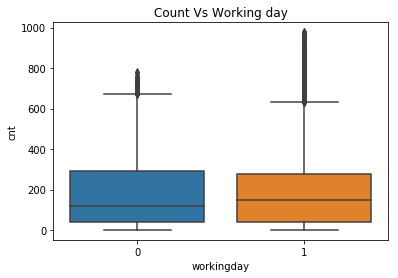

In [150]:
sns.boxplot(data=df,y="cnt",x="workingday").set_title("Count Vs Working day")

#### _We clearly see there is not much effect on the number of bike shared if it is working day or not._

Text(0.5, 1.0, 'Count Vs Hour')

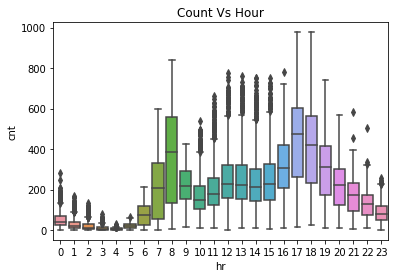

In [33]:
sns.boxplot(data=df,y="cnt",x="hr").set_title("Count Vs Hour")

#### _We clearly see the pattern in demand this chart:_
* _High: 7-9 hr and 16-19 hr_
* _Average: 9-15 hr and 20-22 hr_
* _Low: 0-6 and 23-24 hr_

Text(0.5, 1.0, 'Casual Vs Hour')

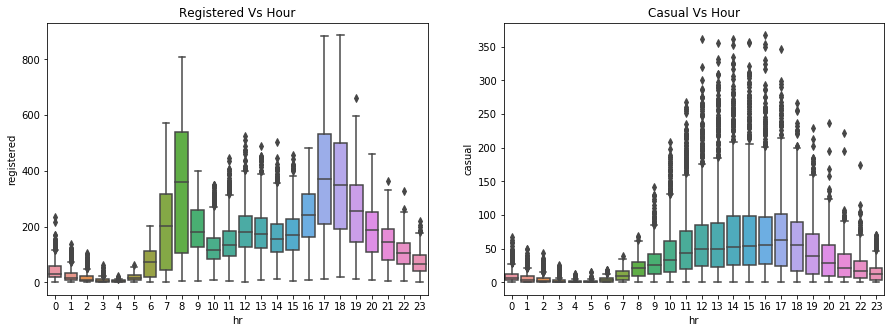

In [50]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(15, 5)
sns.boxplot(x='hr', y='registered', data=df, ax=axs[0]).set_title("Registered Vs Hour")
sns.boxplot(x='hr',y='casual', data=df, ax=axs[1]).set_title("Casual Vs Hour")

__These charts clearly shows there are different trend in casual and registered users.__
* Registered users rent bikes more between 7-9 and 16-20 hours
* Casual users rent the bikes between 10-20 hours

Text(0.5, 1.0, 'Casual Vs Hour')

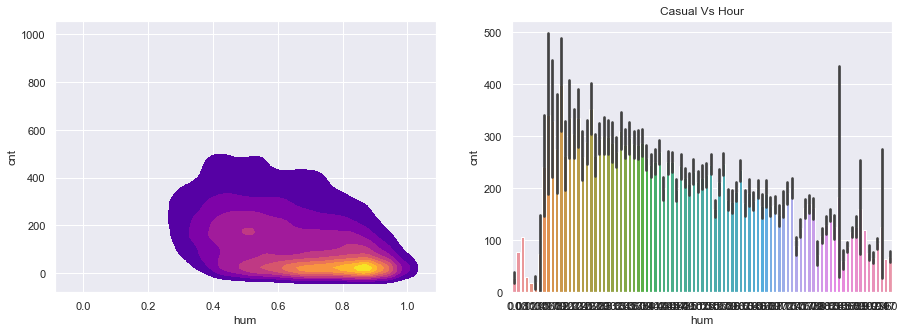

In [450]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(15, 5)
sns.kdeplot(df['hum'],df['cnt'],cmap="plasma", shade=True, shade_lowest=False, ax=axs[0])
sns.barplot(x='hum',y='cnt', data=df, ax=axs[1]).set_title("Casual Vs Hour")

* With increse of Humidity rentals decreases 
* Also there are very few rentals when humidity is close to zero because when there is less humid then it snows and earlier we have seen the pattern when there is snow there are few bike rented

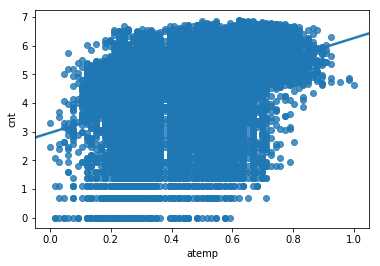

In [202]:
sns.regplot(y="cnt",x="atemp",data=df)

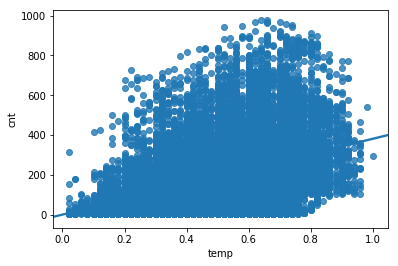

In [78]:
sns.regplot(y="cnt",x="temp",data=df)

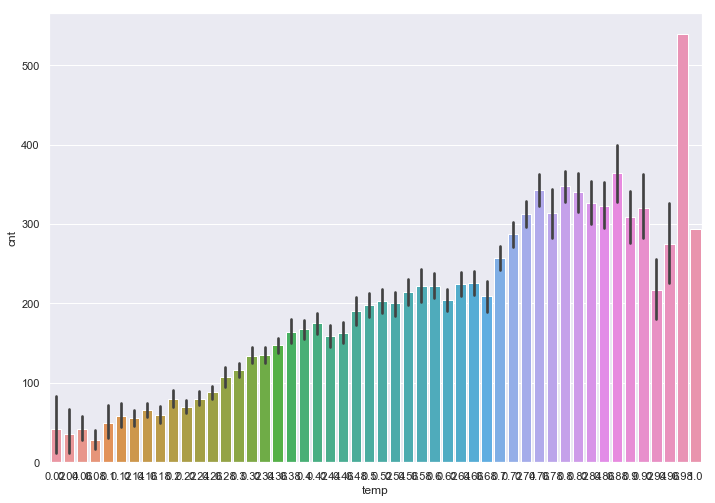

In [440]:
sns.barplot(y="cnt",x="temp",data=df)
sns.set(rc={'figure.figsize':(15,15)})


#### Higher the temperature , more rentals. We can see that with the increase of temperature the bike renting also increasing.

Text(0.5, 1.0, 'Distribution of the count')

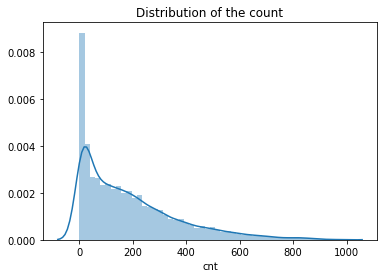

In [310]:
sns.distplot(df['cnt']).set_title("Distribution of the count")  

__The distribution plot should be normal curve or bell shaped curve but we can see that there is skewness in the data so we have to take log or we have deal with outliers of the data so that we can deal with skewness__ 

In [287]:
import math
df['cnt'] = df['cnt'].transform(lambda x: math.log(x))

Text(0.5, 1.0, 'Distribution of the count')

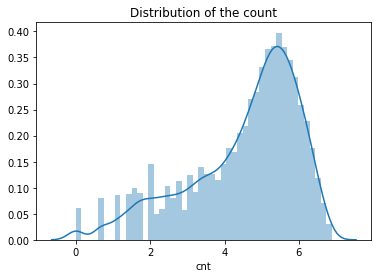

In [288]:
sns.distplot(df['cnt']).set_title("Distribution of the count")  

#### _Now the data has been normalized_

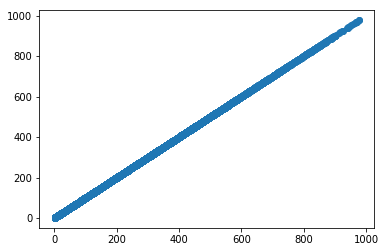

In [311]:
plt.scatter(x = df['casual'] + df['registered'], y = df['cnt'])
plt.show()

__We can notice that registered column and casual column yields count. It was unnecessary to keep these two columns as our features, Machine learning models will be more accurate.__

In [312]:
df= df.drop(['casual','registered','dteday'],axis=1)

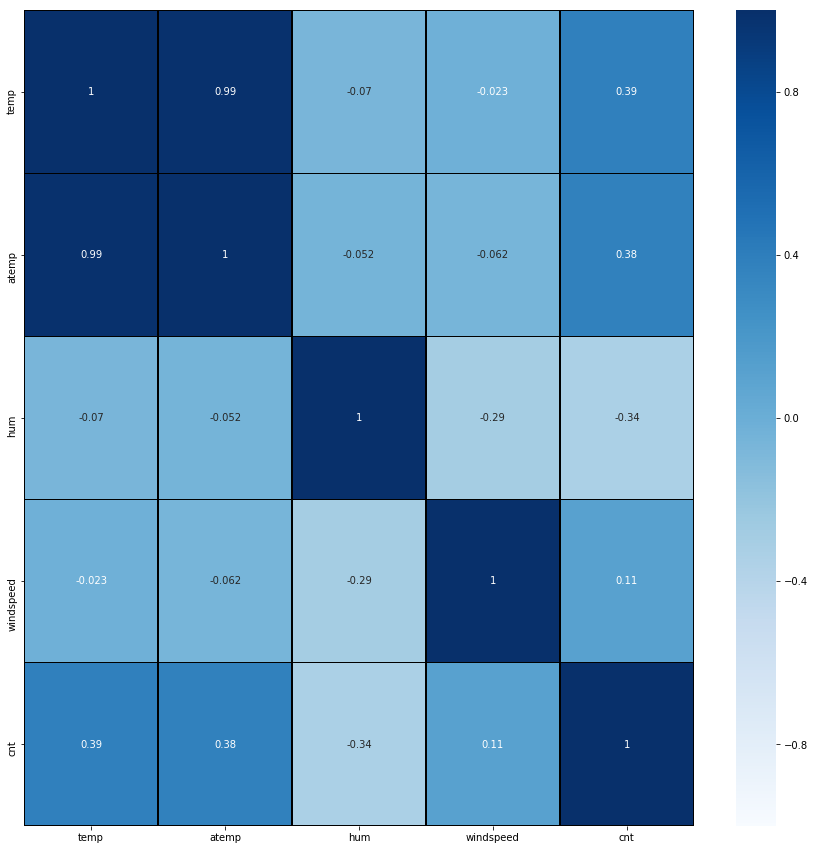

In [290]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1,center=0, cmap='Blues', linecolor= 'Black',linewidth=0.5,annot=True)

By the correlation plot and EDA we conclude that:

 * The variables "temp" and "atemp" are strongly correlated so to remove correltion from our model we have remove "atem" variable.*
 

In [313]:
df = df.drop(['atemp'], axis=1)

### Seperating Categorical and Continous variables

In [327]:
df_categorical_features = df.select_dtypes(include=[np.object])

df_categorical_features.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [328]:
df_numeric_features = df.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

### Joining categorical data and continous data

In [369]:
df_new = pd.concat([df_numcols,df_categorical_features], axis=1)

***
***

## Model Building

***

### Creating Dummies variable of Categorical data

In [383]:
data_dummy = df_new

def dummify_dataset(df_new, column):       
    df_new = pd.concat([df_new, pd.get_dummies(df1[column], prefix=column, drop_first=True)],axis=1)
    df_new = df_new.drop([column], axis=1)
    return df_new

columns_to_dummify = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)

### Spliting data into Train and Test data

In [384]:
from sklearn.model_selection import train_test_split
# create feature and response variable
X= data_dummy.drop(['cnt'],axis=1)
Y= data_dummy['cnt']

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(X,Y, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12165, 52) (5214, 52) (12165,) (5214,)


***

### Linear Regression

In [372]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model= LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [433]:
from sklearn.metrics import r2_score
y_train_predict= lin_model.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2= r2_score(y_train, y_train_predict)
r2

0.6023744485889425

### Using SGD regression to build linear model

In [389]:
from sklearn.linear_model import SGDRegressor
lin_model = SGDRegressor()
# we fit our model with train data
lin_model.fit(x_train, y_train)
# we use predict() to predict our values
lin_model_predictions = lin_model.predict(x_test)
# we check the coefficient of determination with score()
print(lin_model.score(x_test,y_test))

0.6006472759721797


### Mean Square Error

In [390]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lin_model_predictions)
rmse = np.sqrt(mse)
print(rmse)

0.11611705550191108


In [391]:
# ignore the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import GridSearchCV

# Grid search - this will take about 1 minute.
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(lin_model, param_grid)
clf.fit(x_train, y_train)
print("Best score: " + str(clf.best_score_))

Best score: 0.6165363847527181


In [392]:
pred_test = clf.predict(x_test)

In [393]:
print('Best C:',clf.best_estimator_.C) 
print('Best alpha:',clf.best_estimator_.alpha) 
print('Best n_iter:',clf.best_estimator_.n_iter)
print('Best tol:',clf.best_estimator_.tol) 
print('Best eta0:',clf.best_estimator_.eta0) 
print('Best learning rate:',clf.best_estimator_.learning_rate) 

Best C: 1.0
Best alpha: 0.0001
Best n_iter: None
Best tol: None
Best eta0: 0.01
Best learning rate: constant


In [394]:
linreg_SGD = SGDRegressor(loss='squared_loss', alpha=0.001, penalty='l2',eta0=0.01,learning_rate='constant',max_iter=1000)

In [395]:
# ignore the deprecation warning

warnings.filterwarnings("ignore", category=DeprecationWarning)

linreg_SGD.fit(x_train,y_train)

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [396]:
pred_test = linreg_SGD.predict(x_test)

In [397]:
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
print(rmse)

0.17189564970780222


***

### Decision Tree Regressor

In [418]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_train_pred2 = clf.predict(x_train)
y_test_predd = clf.predict(x_test)
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred2 + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_predd + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred2))
print('R2 test: %.3f' % r2_score(y_test, y_test_predd))

RMSLE train: 0.001
RMSLE test: 0.027
R2 train: 1.000
R2 test: 0.964


***

### Random Forest Regression

In [426]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 500, criterion='mse',random_state=1, n_jobs=-1)
forest.fit(x_train, y_train)
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

In [427]:
print('RMSLE train: %.3f' % np.sqrt(mean_squared_error(np.log(y_train + 1), np.log(y_train_pred + 1))))
print('RMSLE test: %.3f' % np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(y_test_pred + 1))))
print('R2 train: %.3f' % r2_score(y_train, y_train_pred))
print('R2 test: %.3f' % r2_score(y_test, y_test_pred))

RMSLE train: 0.021
RMSLE test: 0.054
R2 train: 0.976
R2 test: 0.856


***
***

## Conclusion

The bike sharing services is fast growing sector. Today, more and more cities are implementing sharing bike systems to make enviroment as well as logistic reasons.

By the analysis we can conclude that:

* We ___reject___ the ___NULL Hypothesis___ as the bike sharing is related to many variables like hours, months, season, etc.

* Factors like ___Hours, Temperature, Humidity and Weather Situation___ are major factor which effects ___Bike Sharing___

* After applying the regression on the dataset we find that _Decision tree regressor_ performs better than ___Linear Regression___ and ___Random forest regressor___ in the analysis as the ___R-square value___ was better along with ___RMSE i.e. Root Mean Square value___ was minimum for both train and test model.

***

***